Text(0.5, 1.0, 'Ground Truth : 5')

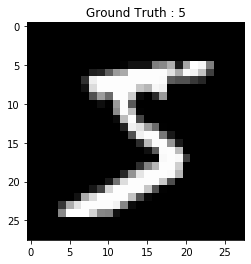

In [2]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
# plt.show()


In [3]:

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)



In [4]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)


In [10]:

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)



Epoch 1/20
235/235 [==============================] - 5s 19ms/step - loss: 0.2706 - accuracy: 0.9161 - val_loss: 0.1764 - val_accuracy: 0.9426
Epoch 2/20
235/235 [==============================] - 4s 17ms/step - loss: 0.0917 - accuracy: 0.9718 - val_loss: 0.1095 - val_accuracy: 0.9654
Epoch 3/20
235/235 [==============================] - 4s 17ms/step - loss: 0.0583 - accuracy: 0.9814 - val_loss: 0.0877 - val_accuracy: 0.9729
Epoch 4/20
235/235 [==============================] - 4s 17ms/step - loss: 0.0407 - accuracy: 0.9870 - val_loss: 0.0770 - val_accuracy: 0.9773
Epoch 5/20
235/235 [==============================] - 4s 17ms/step - loss: 0.0289 - accuracy: 0.9906 - val_loss: 0.0778 - val_accuracy: 0.9784
Epoch 6/20
235/235 [==============================] - 4s 18ms/step - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.0833 - val_accuracy: 0.9781
Epoch 7/20
235/235 [==============================] - 4s 18ms/step - loss: 0.0173 - accuracy: 0.9947 - val_loss: 0.0881 - val_accuracy: 0.9790

In [11]:
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Evaluation result on Test Data : Loss = 0.14595501124858856, accuracy = 0.9818000197410583


In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
#Plotting validation Accracy and training Accuracy

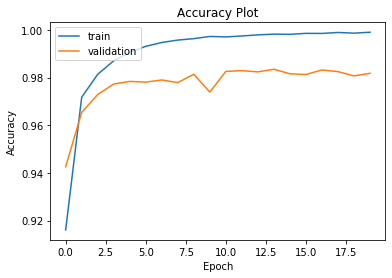

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Plotting validation Loss and training Loss

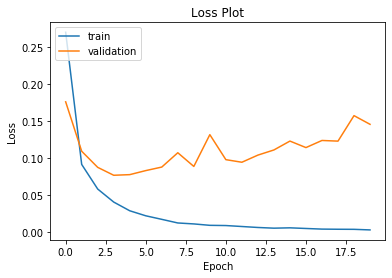

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Selecting 9th image

Text(0.5, 1.0, 'Ground Truth : 9')

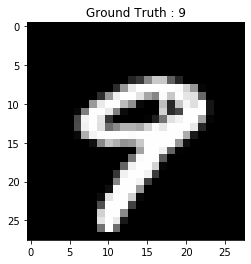

In [23]:
#display the first image in the training data
plt.imshow(test_images[9,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(test_labels[9]))

In [ ]:
# Predicting the selected image

In [24]:
example=model.predict_classes(test_data[[9],:])
print("Output Predicted",test_labels[example])

Output Predicted [9]


In [ ]:
# increased the number of hidden layers

In [8]:

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)


Epoch 1/20
235/235 [==============================] - 5s 23ms/step - loss: 3.1145 - accuracy: 0.8441 - val_loss: 0.3462 - val_accuracy: 0.9039
Epoch 2/20
235/235 [==============================] - 5s 21ms/step - loss: 0.2014 - accuracy: 0.9458 - val_loss: 0.1730 - val_accuracy: 0.9613
Epoch 3/20
235/235 [==============================] - 6s 25ms/step - loss: 0.1576 - accuracy: 0.9598 - val_loss: 0.1407 - val_accuracy: 0.9646
Epoch 4/20
235/235 [==============================] - 6s 27ms/step - loss: 0.1369 - accuracy: 0.9664 - val_loss: 0.2267 - val_accuracy: 0.9516
Epoch 5/20
235/235 [==============================] - 6s 24ms/step - loss: 0.1171 - accuracy: 0.9710 - val_loss: 0.2357 - val_accuracy: 0.9643
Epoch 6/20
235/235 [==============================] - 6s 26ms/step - loss: 0.1027 - accuracy: 0.9752 - val_loss: 0.1872 - val_accuracy: 0.9679
Epoch 7/20
235/235 [==============================] - 6s 25ms/step - loss: 0.0947 - accuracy: 0.9774 - val_loss: 0.1861 - val_accuracy: 0.9682

In [ ]:
#increased the number of hidden layers with differt dense layers

In [5]:

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)

Epoch 1/20
235/235 [==============================] - 9s 36ms/step - loss: 0.3553 - accuracy: 0.8928 - val_loss: 0.1423 - val_accuracy: 0.9569
Epoch 2/20
235/235 [==============================] - 9s 36ms/step - loss: 0.1129 - accuracy: 0.9678 - val_loss: 0.1031 - val_accuracy: 0.9694
Epoch 3/20
235/235 [==============================] - 8s 36ms/step - loss: 0.0726 - accuracy: 0.9779 - val_loss: 0.1692 - val_accuracy: 0.9569
Epoch 4/20
235/235 [==============================] - 9s 37ms/step - loss: 0.0535 - accuracy: 0.9851 - val_loss: 0.1158 - val_accuracy: 0.9716
Epoch 5/20
235/235 [==============================] - 9s 37ms/step - loss: 0.0444 - accuracy: 0.9872 - val_loss: 0.1072 - val_accuracy: 0.9752
Epoch 6/20
235/235 [==============================] - 9s 37ms/step - loss: 0.0388 - accuracy: 0.9893 - val_loss: 0.0881 - val_accuracy: 0.9806
Epoch 7/20
235/235 [==============================] - 9s 38ms/step - loss: 0.0324 - accuracy: 0.9914 - val_loss: 0.1916 - val_accuracy: 0.9731

In [ ]:
#increased the number of hidden layers with differt dense layers and different activation layers

In [6]:

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='tanh'))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)

Epoch 1/20
235/235 [==============================] - 9s 38ms/step - loss: 0.3635 - accuracy: 0.8883 - val_loss: 0.1556 - val_accuracy: 0.9525
Epoch 2/20
235/235 [==============================] - 9s 36ms/step - loss: 0.1149 - accuracy: 0.9670 - val_loss: 0.1463 - val_accuracy: 0.9556
Epoch 3/20
235/235 [==============================] - 9s 37ms/step - loss: 0.0736 - accuracy: 0.9777 - val_loss: 0.1267 - val_accuracy: 0.9654
Epoch 4/20
235/235 [==============================] - 9s 38ms/step - loss: 0.0520 - accuracy: 0.9847 - val_loss: 0.0956 - val_accuracy: 0.9743
Epoch 5/20
235/235 [==============================] - 10s 43ms/step - loss: 0.0403 - accuracy: 0.9879 - val_loss: 0.0961 - val_accuracy: 0.9749
Epoch 6/20
235/235 [==============================] - 10s 40ms/step - loss: 0.0325 - accuracy: 0.9902 - val_loss: 0.1015 - val_accuracy: 0.9757
Epoch 7/20
235/235 [==============================] - 10s 43ms/step - loss: 0.0256 - accuracy: 0.9921 - val_loss: 0.0894 - val_accuracy: 0.9

In [ ]:
#Removed the scalling and ran the code

Epoch 1/20
235/235 [==============================] - 3s 12ms/step - loss: 6.8235 - accuracy: 0.8774 - val_loss: 0.5949 - val_accuracy: 0.9378
Epoch 2/20
235/235 [==============================] - 3s 13ms/step - loss: 0.4263 - accuracy: 0.9458 - val_loss: 0.6015 - val_accuracy: 0.9263
Epoch 3/20
235/235 [==============================] - 4s 16ms/step - loss: 0.2582 - accuracy: 0.9585 - val_loss: 0.3615 - val_accuracy: 0.9470
Epoch 4/20
235/235 [==============================] - 3s 12ms/step - loss: 0.2069 - accuracy: 0.9659 - val_loss: 0.2769 - val_accuracy: 0.9591
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1753 - accuracy: 0.9722 - val_loss: 0.3808 - val_accuracy: 0.9582
Epoch 6/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1636 - accuracy: 0.9736 - val_loss: 0.4016 - val_accuracy: 0.9567
Epoch 7/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1543 - accuracy: 0.9773 - val_loss: 0.3876 - val_accuracy: 0.9631

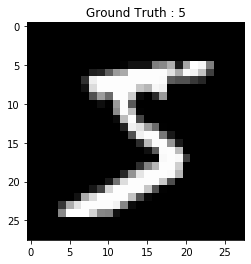

In [7]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
# plt.show()

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
#train_data /=255.0
#test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
